In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [8]:
athlete=pd.read_csv('athlete_events.csv')
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
region=pd.read_csv('noc_regions.csv')
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [10]:
df = pd.merge(athlete,region, how='outer', sort=True, on=['NOC'])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
2,1101.0,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,AFG,1948 Summer,1948.0,Summer,London,Football,Football Men's Football,NaN,Afghanistan,NaN
3,1745.0,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,AFG,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,Afghanistan,NaN
4,4628.0,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,AFG,1964 Summer,1964.0,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,Afghanistan,NaN


In [11]:
df_swim=df[['Sex','Age','Height','Team','Year','Season','City','Medal']]

In [12]:
age_array = df_swim[df["Age"]!=np.nan]["Age"]

df_swim['Age'].fillna(df_swim['Age'].mean(), inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [13]:
def func(y):
        if y== 'Gold':
            return 1
        elif y== 'Silver':
            return 2
        elif y== 'Bronze':
            return 3
        else:
            return 4
df_swim['Medal_encoded']=df_swim['Medal'].apply(func)

print(df_swim)
        

       Sex        Age  Height         Team    Year  Season            City  \
0        M  25.556898     NaN  Afghanistan  1956.0  Summer       Melbourne   
1        M  28.000000     NaN  Afghanistan  1936.0  Summer          Berlin   
2        M  25.556898     NaN  Afghanistan  1948.0  Summer          London   
3        M  17.000000   156.0  Afghanistan  1980.0  Summer          Moskva   
4        M  22.000000     NaN  Afghanistan  1964.0  Summer           Tokyo   
5        M  25.556898     NaN  Afghanistan  1972.0  Summer          Munich   
6        M  17.000000     NaN  Afghanistan  1936.0  Summer          Berlin   
7        M  25.556898     NaN  Afghanistan  1948.0  Summer          London   
8        M  25.556898     NaN  Afghanistan  1948.0  Summer          London   
9        M  22.000000     NaN  Afghanistan  1936.0  Summer          Berlin   
10       M  25.556898     NaN  Afghanistan  1948.0  Summer          London   
11       M  25.000000   160.0  Afghanistan  1980.0  Summer      

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [14]:
df_swim.loc[lambda df:df_swim ['Age'] > 80, :]

,Sex,Age,Height,Team,Year,Season,City,Medal,Medal_encoded
38942,M,81.0,NaN,Canada,1948.0,Summer,London,NaN,4
87506,M,81.0,NaN,France,1924.0,Summer,Paris,NaN,4
92291,M,84.0,NaN,Great Britain,1948.0,Summer,London,NaN,4
251994,M,88.0,NaN,United States,1932.0,Summer,Los Angeles,NaN,4
251995,M,88.0,NaN,United States,1932.0,Summer,Los Angeles,NaN,4
251996,M,88.0,NaN,United States,1932.0,Summer,Los Angeles,NaN,4
254942,M,96.0,NaN,United States,1932.0,Summer,Los Angeles,NaN,4
265052,M,97.0,NaN,United States,1928.0,Summer,Amsterdam,NaN,4


In [15]:
#compare average age for each olympics with plots and then maybe compare average age to medal count

In [16]:
def func(X):
        if X== 'M':
            return 1
        elif X== 'F':
            return 0
        else:
            return 0
        
df_swim['Gender_encoded']=df_swim['Sex'].apply(func)
        

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
df_swim.dtypes

Sex                object
Age               float64
Height            float64
Team               object
Year              float64
Season             object
City               object
Medal              object
Medal_encoded       int64
Gender_encoded      int64
dtype: object

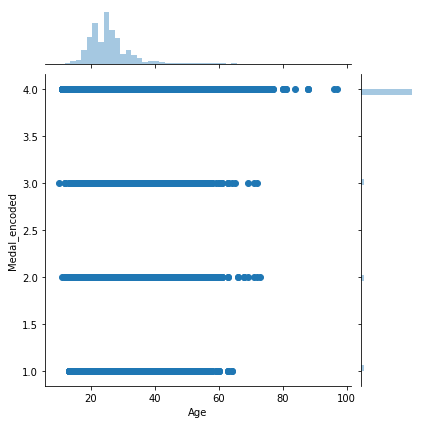

In [18]:
import seaborn as sns

sns.jointplot(x='Age', y='Medal_encoded', kind='scatter',data= df_swim)

In [19]:
 df_swim['Decade'] = df_swim['Year'] // 10 * 10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_swim.groupby('Decade')['Age'].mean()

Decade
1890.0    24.428354
1900.0    26.817587
1910.0    27.462098
1920.0    28.261704
1930.0    28.839619
1940.0    28.276593
1950.0    26.040309
1960.0    24.774850
1970.0    24.099658
1980.0    23.946839
1990.0    24.634049
2000.0    25.656233
2010.0    26.078884
Name: Age, dtype: float64

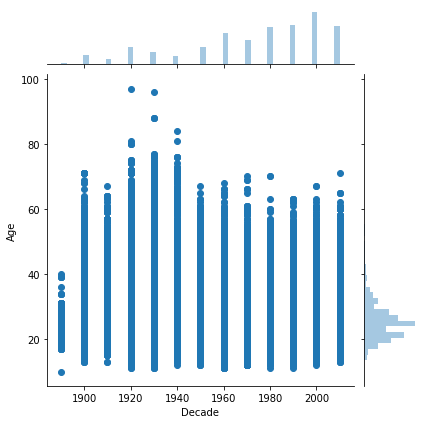

In [21]:
sns.jointplot (x= 'Decade', y='Age', kind= 'scatter', data= df_swim)

In [22]:
df_swim['Mean_Age'] = df_swim['Age'].mean()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


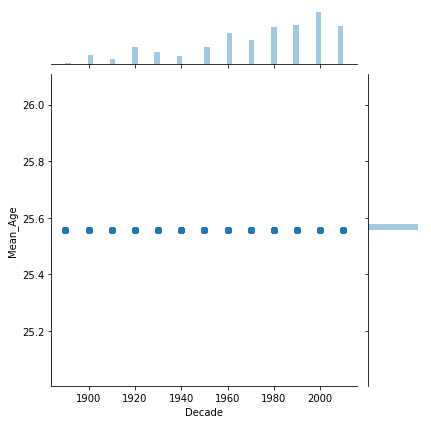

In [23]:
sns.jointplot (x= 'Decade', y='Mean_Age', kind= 'scatter', data= df_swim)

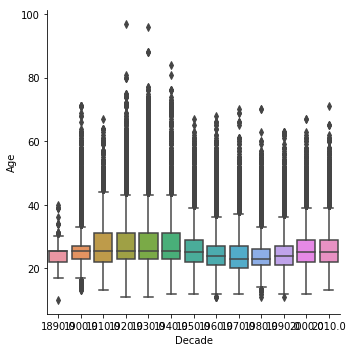

In [24]:
sns.catplot (x= 'Decade', y='Age', kind= 'box', data= df_swim)

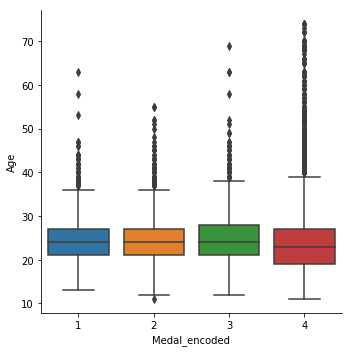

In [25]:
sns.catplot (x= 'Medal_encoded', y='Age', kind= 'box', data= df_swim[df_swim['Gender_encoded']==0])

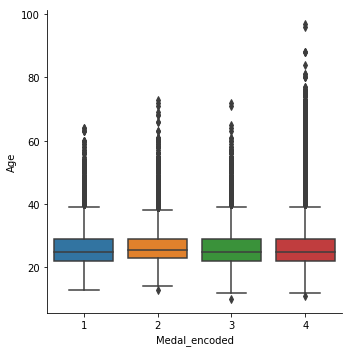

In [26]:
sns.catplot (x= 'Medal_encoded', y='Age', kind= 'box', data= df_swim[df_swim['Gender_encoded']==1])

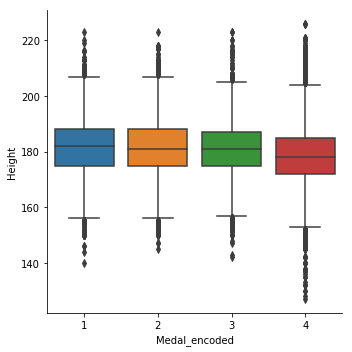

In [27]:
sns.catplot (x= 'Medal_encoded', y='Height', kind= 'box', data= df_swim[df_swim['Gender_encoded']==1])

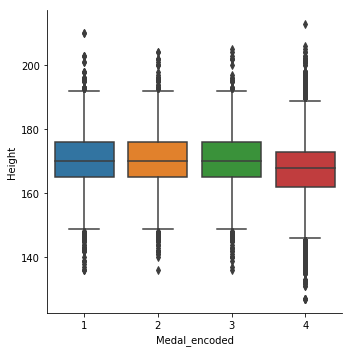

In [28]:
sns.catplot (x= 'Medal_encoded', y='Height', kind= 'box', data= df_swim[df_swim['Gender_encoded']==0])

In [29]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = df_swim[['Age', 'Height']]
Y = df_swim['Medal_encoded']
X= X.dropna(axis=1)

print (X.shape)
print (Y.shape)


cross_val_score(rfc, X, Y, cv=5)

(271117, 1)
(271117,)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

array([0.85324112, 0.85325686, 0.8532726 , 0.8532726 , 0.85326989])

In [30]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = df_swim[['Height','Gender_encoded']]
Y = df_swim['Medal_encoded']
X= X.dropna(axis=1)

print (X.shape)
print (Y.shape)


cross_val_score(rfc, X, Y, cv=5)

(271117, 1)
(271117,)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

array([0.85324112, 0.85325686, 0.8532726 , 0.8532726 , 0.85326989])

In [31]:
def func(X):
        if X== 1:
            return 1
        elif X== 2:
            return 1
        elif X== 3:
            return 1
        else:
            return 0
        
df_swim['Medal_binary']=df_swim['Medal_encoded'].apply(func)
        

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [32]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = df_swim[['Age', 'Gender_encoded']]
Y = df_swim.Medal_binary
neighbors.fit(X,Y)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [33]:
neighbors.predict([[24, 0]])

array([0])

In [43]:
knn_data = df_swim[['Age', 'Height', 'Medal_binary']]
knn_data.dropna(subset=['Height'],inplace=True)
X = knn_data[['Age', 'Height']]
Y = knn_data['Medal_binary']
neighbors.fit(X,Y)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [45]:
neighbors.predict([[24, 180]])

array([0])

In [46]:
knn_data.isna().sum()

Age             0
Height          0
Medal_binary    0
dtype: int64

In [36]:
X.head()

,Age,Height
0,25.556898,NaN
1,28.000000,NaN
2,25.556898,NaN
3,17.000000,156.0
4,22.000000,NaN


In [41]:
df_swim.dtypes

Sex                object
Age               float64
Height            float64
Team               object
Year              float64
Season             object
City               object
Medal              object
Medal_encoded       int64
Gender_encoded      int64
Decade            float64
Mean_Age          float64
Medal_binary        int64
dtype: object

In [ ]:
# make another column to make medals binary so 1,2,3=yes and 4=no. weight the medals 5% each , to predict yes or no if you recieve a medal

In [ ]:
#random forest for data comparing height, age, medal? explain if you drop rows why, or median for NaN, explain or look into how many rows are NaN and correlation. 